 # Training of the AI model with Google Colab for faster training

#### Importing face mask dataset from Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Unzipping images:

In [2]:
import os
from zipfile import ZipFile

path = r'/content/drive/My Drive/Data/FaceMask_Dataset'

for zip in os.listdir(path):
  file_name = os.path.join(path, zip)
  print('Unziping: ' + file_name)
  with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/OkFaceMask.zip
Done
Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/NoFaceMask.zip
Done
Unziping: /content/drive/My Drive/Data/FaceMask_Dataset/BadFaceMask.zip
Done


#### Preparing the input data (images) and the output (prediction):

In [3]:
import pathlib
import cv2
import numpy as np

imageSize = 100
channel = 1 
path = '/content'
X = [] # Data
Y = [] # Label

dict_label  = { 'NoFaceMask':0 , 'OkFaceMask':1 , 'BadFaceMask':2 }

faceMaskDirectories = [str(directory) for directory in pathlib.Path(path).glob('*') if 'Mask' in str(directory)]

for directory in faceMaskDirectories:
  for image in pathlib.Path(directory).glob('*/*'):
    if image.suffix in {'.jpg', '.png'}:
      img = cv2.imread(str(image), 0)
      X.append(img)
      Y.append(dict_label[directory.split('/')[-1]])

X = np.asarray(X)
Y = np.asarray(Y)
print('Array X type: ' , type(X))
print('Array Y type: ' , type(Y))
print('Array X shape:' , X.shape)
print('Array Y shape:' , Y.shape)

Array X type:  <class 'numpy.ndarray'>
Array Y type:  <class 'numpy.ndarray'>
Array X shape: (14339, 100, 100)
Array Y shape: (14339,)


#### Image and label:

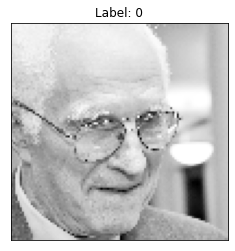

In [4]:
import matplotlib.pyplot as plt
exampleImage = 5000
plt.imshow(X[exampleImage], cmap='Greys_r')
plt.title('Label: ' + str(Y[exampleImage]))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()